### Some of the interesting things that i found: 
1. That smokers had a much higher medical cost then that of non-smokers 
2. That BMI was not really affected by the number of children 
3. That the highest medical cost came from having three children and that it was lowest for those that had 5 children
4. Being a smoker or not does not determine the average bmi.
5. As age goes up so does the average medical cost.
6. Males have slightly higher medical cost then females 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pdp
from scripts.project_functions import data_processing


In [3]:
df = data_processing("../../data/raw/Medical_Cost.csv")

In [4]:
df.to_csv ("../../data/processed/Medical_Cost.csv", index = False, header=True)

In [131]:
#sns.countplot(x = 'children', data = df, hue = 'smoker')
#df1 = df.groupby('smoker')['charges'].sum()
#df1
#sns.countplot(hue= 'smoker', x = 'charges', data = df)
df1 = df.loc[(df['Smoker']) == 'yes']
print(df1)
print(df1['Charges'].count())
print(df1['Charges'].sum())
print(df1['Charges'].mean())

     Age     Sex     BMI  Children Smoker     Region      Charges
0     54  female  47.410         0    yes  southeast  63770.42801
1     45    male  30.360         0    yes  southeast  62592.87309
2     52    male  34.485         3    yes  northwest  60021.39897
3     31  female  38.095         1    yes  northeast  58571.07448
4     33  female  35.530         0    yes  northwest  55135.40209
..   ...     ...     ...       ...    ...        ...          ...
366   26  female  17.195         2    yes  northeast  14455.64405
379   18  female  21.660         0    yes  northeast  14283.45940
398   19  female  21.700         0    yes  southwest  13844.50600
402   18    male  21.565         0    yes  northeast  13747.87235
445   18    male  17.290         2    yes  northeast  12829.45510

[274 rows x 7 columns]
274
8781763.521839999
32050.23183153284


In [29]:
df1 = df.loc[(df['Smoker']) == 'no']
print(df1['Charges'].count())
print(df1['Charges'].sum())
print(df1['Charges'].mean())

1064
8974061.468919
8434.268297856202


In [31]:
df1 = df.groupby(['Smoker','Charges'])

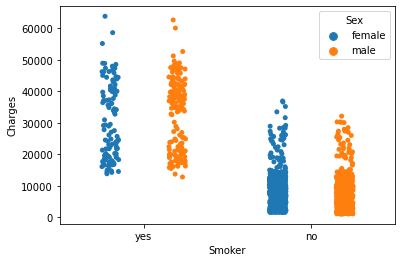

In [33]:
sns.stripplot(x = 'Smoker', y= 'Charges', data = df, hue = 'Sex', jitter = True, dodge = True)
# This plot is showing that sex doesnt really matter but the charges are higher for smokers compared to non smokers 

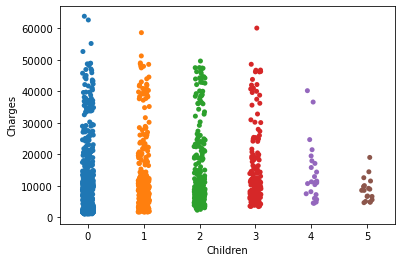

In [38]:
sns.stripplot(x = 'Children', y = 'Charges', data = df, jitter = True)# hue = 'Sex', dodge = True)

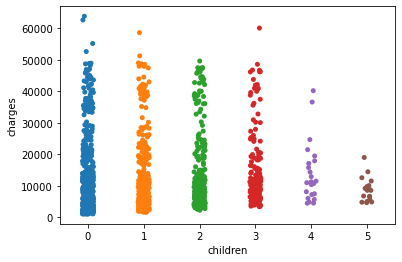

In [5]:
sns.stripplot(x = 'children', y = 'charges', data = df, jitter = True, dodge = True)

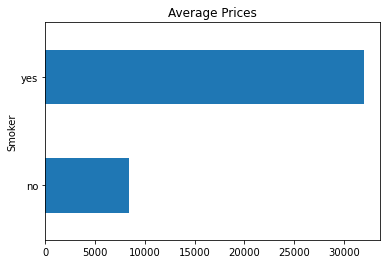

In [40]:
df_prices = df.groupby("Smoker").agg([np.mean])
buddy = df_prices['Charges']
buddy
buddy.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices")

# This plot is showing the average medical costs for smokers compared to non smokers and i think that it shows it in a clearer way then in the graph above 

                Age        BMI       Charges
               mean       mean          mean
Children                                    
0         38.444251  30.550296  12365.975602
1         39.453704  30.623148  12731.171832
2         39.445833  30.978104  15073.563734
3         41.566879  30.684331  15355.318367
4         39.000000  31.391200  13850.656311
5         35.611111  29.605000   8786.035247


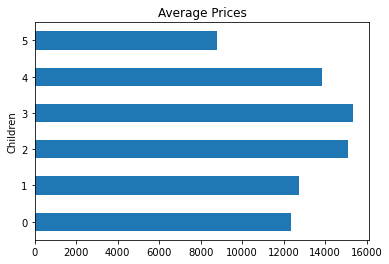

In [82]:
df_prices_children = df.groupby("Children").agg([np.mean])
print(df_prices_children)
charge = df_prices_children['Charges']
age = df_prices_children['Age']
charge.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices")

#This is giving me the Charges based on the number of kids and is showing me that they are highest at three and then the lowest at 5 which i kinda of interesting
#The bmi in this seems to be around the same so it doesnt change based on the number of kids 

In [146]:
#df_prices = df.groupby("Sex") #.agg([np.mean])
# df1 = df[['Sex','BMI','Children']]
# df11 = df1.groupby('Children')
# df11.count()
# sns.lineplot(data=df11, palette="tab10", linewidth=2.5)
#sns.lineplot(data=flights, x="year", y="passengers", hue="month")
#df11 = df1.groupby('Children', 'Sex')
#sns.lineplot(data=df, palette="tab10", linewidth=2.5, hue = 'Sex')
#bmi = df_prices['BMI']
#bmi.count()
#bmi.plot(kind = "barh", y = "mean", legend = False, 
#            title = "Average Prices")
#df_prices_children
#sns.stripplot(x = 'Sex', y = 'BMI', data = df_prices_children, jitter = True)# hue = 'Sex', dodge = True)
# df_female = df.loc[(df['Sex']) == 'female'].reset_index(drop = True)
# df_female1 = df_female.groupby('Children').agg(np.mean)
# df_female1
# df_male = df.loc[(df['Sex'])== 'male'].reset_index(drop =True)
# df_male1 = df_male.groupby('Children').agg(np.mean)
# df_male1
# print(df_female)
# print(df_male)

#This was a failed attempt that i thought i would keep incase i needed to go back and check it for reference 


,Age,BMI,Charges
Children,,,
0,38.543860,30.741719,12832.696736
1,39.403614,31.166145,13273.522458
2,38.396694,31.300992,16187.095325
3,40.975000,30.922937,16789.167419
4,36.642857,30.957500,13782.284829
5,34.500000,28.792500,7931.658310


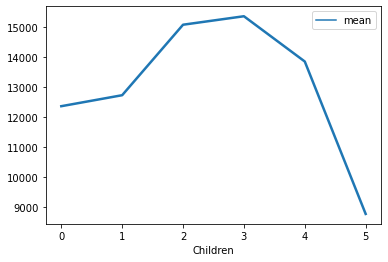

In [48]:
sns.lineplot(data=charge, palette="tab10", linewidth=2.5)
# This is just a different graph displaying the data above 

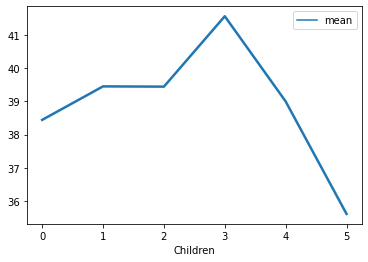

In [51]:
sns.lineplot(data=age, palette="tab10", linewidth=2.5)
# I find this interesting that the age when compared with the children follows almost the same line as the charges when compared to the children 

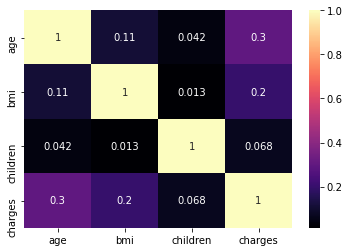

In [156]:
df_mx = df.corr()
sns.heatmap(df_mx, annot = True, cmap = 'magma')



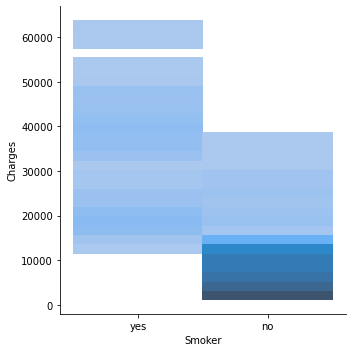

In [53]:
sns.displot(df, x = 'Smoker', y= 'Charges')

#This is just showing more data when comparing smoking on charges it shows that when smoking the charges are a lot more spread out but when comparing the non-smokers the charges
# are alot more heavily weighted to the bottom with most people having charges less than 10000 dollars

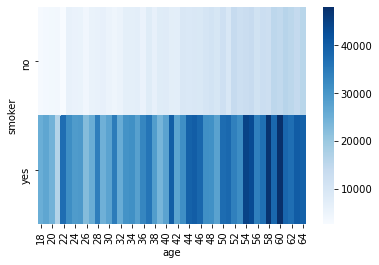

In [166]:
medical = df.pivot_table(columns = 'age', values = 'charges', index = 'smoker')
sns.heatmap(medical, cmap = 'Blues', linecolor='white')

# Again another graph showing the correlation between smokers and non-smokers i feel like this is an obvious correlation so probably wont have the research question centered
# around this. 

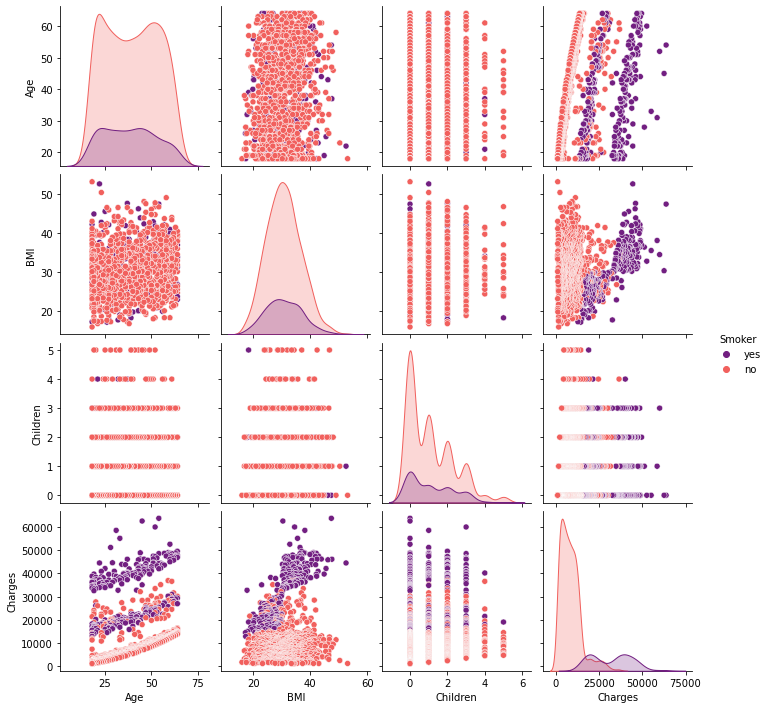

In [12]:
# I think that i know want to look at how the number of children affects the person being a smoker or not 
sns.pairplot(df, hue = 'Smoker', palette = 'magma')


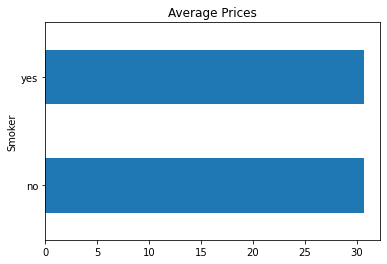

In [32]:
#Also could look at the bmi of smokers compared to non-smokers
df_bmi_smoker = df.loc[:,['Smoker','BMI']].reset_index(drop =True)
df_bs = df_bmi_smoker.groupby("Smoker").agg([np.mean])
df_bs.plot(kind = "barh", y = "BMI", legend = False, 
                   title = "Average Prices")
# Well after looking at this graph i can clearly see that being a smoker does not change your average bmi.

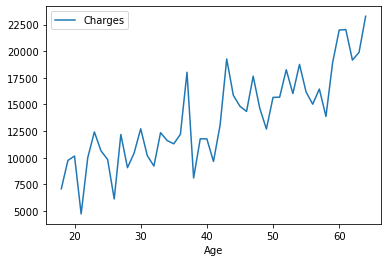

In [136]:
# Next i want to look at if the age affects medical costs(as you get older does your average medical go up )
# So to do this i need to get the medical costs and age column 
#df_bmi_smoker = 
new_df = df.loc[:,['Age','Charges']].reset_index(drop =True)
average_new_df = new_df.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)
sns.lineplot(data = average_new_df)

# This graph shows that as age goes up the medical costs are clearly all increasing 

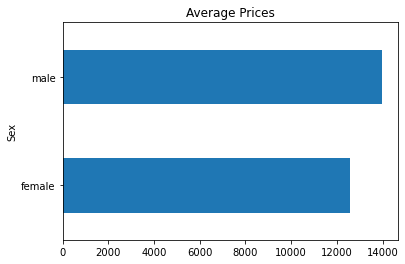

In [113]:
# I want to see how average medical cost compares between men and women
# Do to see i need the charge column and i also need the sex column 
df_sex = df.loc[:,['Sex','Charges']].reset_index(drop = True)
average_df_sex = df_sex.groupby(df['Sex']).agg(np.mean)
average_df_sex.plot(kind = "barh", y = "Charges", legend = False, 
           title = "Average Prices")
# This shows that males have a slightly higher medical costs then females 

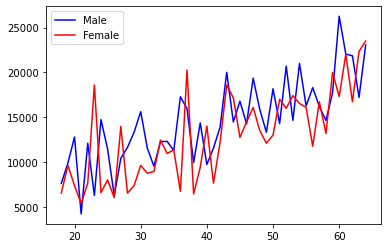

In [143]:
# I want to combine the last two plots and show the average cost per age of males and females seperately 
# I think that one way to approach this is to seperate the males and females and then get average medical costs and then plot that together 
# Getting the male data first 
new_df_male = df.loc[df['Sex'] == 'male']
new_male = new_df_male.loc[:,['Age','Charges']]
average_male_df = new_male.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)
# Now getting the female data
new_df_female = df.loc[df['Sex'] == 'female']
new_female = new_df_female.loc[:,['Age','Charges']]
average_female_df = new_female.groupby(df['Age']).agg(np.mean).drop(['Age'], axis = 1)

#average_new_df = new_df.groupby(df['Age']).agg(np.mean)
#sns.lineplot(data = average_new_df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(average_male_df, color = 'blue', label = 'Male')
ax.plot(average_female_df, color = 'Red', label = 'Female')
ax.legend() 

# This shows that there is really not a huge difference in gender difference it appears that they both rise pretty significantly i do think that it is interesting at 42 to 44 mark in 
# females how it jumps from 7500 to 16000 and it kinda remains up there. Ald